# Analisis numérico - TP N1
## Búsqueda de raíces

### Curso:
    Sassano
### Integrantes:       
    Apellido y nombre           mail                  padrón
    Romero Espinoza, J .        ajromero@fi.uba.ar    103942
    Cabrera Rodríguez, Mateo.   mcabrerar@gmail.com   108118

### Lenguaje elegido: 
    Python
    

In [1]:
#Importamos las librerías a usar

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random
import math

# 1. Fuerza Bruta
Vamos a descubrir la contraseña de un candado 
<ol type="a">
    <li> Definir un número entero de 3 dígitos al azar a tráves de la función random, simulando la
    clave de un candado.</li>
    <li> Programar un algoritmo de fuerza bruta para hallar la clave.</li>
    <li> Realizar el experimento al menos 100000 veces, anotando la cantidad de intentos realizados
    hasta hallar la respuesta.</li>
    <li> Realizar un histograma para gráficar los intentos. Las columnas del histograma serán separadas en 0-10, 10-20, 20-30, etc...</li>
    <li> ¿Sirve como método de búsqueda de raíces?</li>
    <li> ¿Bajo que condiciones lo utilizaría?</li>
    <li> ¿Sería correcto hablar de convergencia?</li>
</ol>

In [6]:

# a. Se define una clave de 3 dígitos al azar
def nueva_clave():
    clave = random.randint(0,999)
    clave = str(clave).zfill(3)
    return clave

print("Por ejemplo, una clave al azar es: ", nueva_clave())

Por ejemplo, una clave al azar es:  570


In [13]:
# b. Programamos un algorimo de fuerza bruta para encontrar la clave
def fuerza_bruta(clave):
    for i in range(1000):
        if clave == str(i).zfill(3):
            return i

In [17]:
# c. Generamos una clave al azar y usamos fuerza bruta para encontrarla 1000000 veces, anotando la cantidad de intentos por cada búsqueda
ITERACIONES = 1000000
intentos = []
for i in range(ITERACIONES):
    clave = nueva_clave()
    n = fuerza_bruta(clave)

    intentos.append(n)

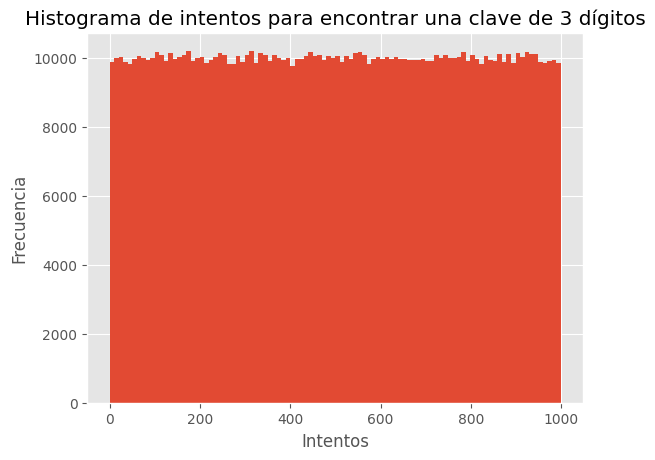

In [18]:
# d. Realizamos un histograma para mostrar la frecuencia de intentos.
plt.hist(intentos, bins=100)
plt.xlabel("Intentos")
plt.ylabel("Frecuencia")
plt.title("Histograma de intentos para encontrar una clave de 3 dígitos")
plt.show()

Con el gráfico podemos observar que este algoritmo tarda en obtener la clave menos de 10 intentos o más de 900 en aproximadamente la mísma cantidad de casos. No tenemos control ni conocimiento de cuanto va a tardar, más allá de saber que tomará entre 1 y 1000 intentos uniformemente.

¿Podría ser esto causa de una mala elección de numeros que probar al hacer fuerza bruta? Vamos a pobar elegir número en un orden distinto para ver otros resultados y compararlos.

In [19]:
# definimos un segundo algoritmo de fuerza bruta que busque en otro orden
def fuerza_bruta2(clave):
    for i in range(1000):
        if clave == str(i if i%2==0 else 1000-i).zfill(3):
            return i

In [20]:
intentos_otro_orden = []
for i in range(ITERACIONES):
    clave = nueva_clave()
    n = fuerza_bruta2(clave)

    intentos_otro_orden.append(n)

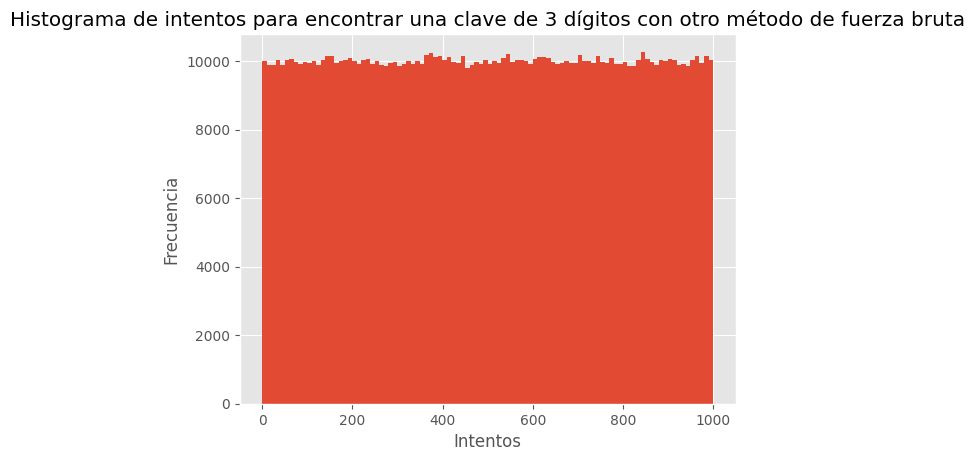

In [21]:
plt.hist(intentos_otro_orden, bins=100)
plt.xlabel("Intentos")
plt.ylabel("Frecuencia")
plt.title("Histograma de intentos para encontrar una clave de 3 dígitos con otro método de fuerza bruta")
plt.show()

Como podemos ver en el segundo gráfico, obtuvimos resultados muy similares. Lo que tarde el algoritmo de fuerza bruta, no dependerá del orden en el que probemos todas las posibilidades.

e. ¿Sirve como método de búsqueda de raíces?

El método de búsqueda de fuerza bruta no es un método eficiente para la búsqueda de raíces de una función, ya que puede ser muy costoso, es decir requiere demasiado esfuerzo y tiempo, especialmente cuando el espacio de búsqueda es grande. Este método, no utiliza ningún tipo de información acerca de la función para acelerar la búsqueda, como sería ideal que se haga en caso de tenerlos disponibles.

f. ¿Bajo que condiciones lo utilizaría?

El método de búsqueda de fuerza bruta puede ser útil en casos donde no tengo ningún tipo de información disponible sobre mi función que pueda aprovechar para acelerar la búsqueda. El ejemplo del ejercicio, la búsqueda de una clave, la podémos imaginar como una función simple, que vale 1 en cualquier número del dominio excepto en la clave, donde vale 0. Esta función no tiene información explotable, por lo que la única manera de asegurar encontrar la raíz, es probar todos los casos posibles.

En caso de contar con información extra, lo ideal sería utilizar métodos de búsqueda que convergan más rápido, como bisección o Newton-Raphson.

g. ¿Sería correcto hablar de convergencia?

No es correcto hablar de convergencia cuando se habla de fuerza bruta. El algoritmo no se acerca gradualmente a la solución a medida que se realizan más intentos, sino que prueba todas las posibles soluciones en un orden arbitrario. No conoce cuando está cerca o lejos de la solución.

# 2. Hallar π por dos caminos
<ol type="a">
    <li> Programar un algoritmo para aproximar π utilizando la función seno(x) con el método de Newton-Raphson, en función de x, que realice iteraciones hasta alcanzar el límite de la herramienta utilizada.</li>
    <li> Programar un algoritmo para aproximar π utilizando la serie de Leibniz, en función de n.</li>
    <li> Ejecutar los programas solicitados en a y b utilizando representación de punto flotante de 32 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.</li>
    <li> Ejecutar los programas solicitados en a y b utilizando representación de punto flotante de 64 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.</li>
    <li> (OPCIONAL) Ejecutar los programas solicitados en a y b con una calculadora (aclarar marca y modelo) y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000 (en caso de no alcanzar la memoria de la calculadora utilizar el máximo n posible).</li>
    <li> Representar las dos respuestas finales obtenidas (para n = 100000 y el método de Newton Raphson) en c, d y e de manera de expresarlo como π = ¯π + ∆π.</li>
    <li> ¿Podemos afirmar qué para la computadora el número π es una constante?</li>
</ol>

In [21]:
# a. Programar un algoritmo para aproximar π utilizando la función seno(x) con el método de Newton-Raphson, en función de x, 
# que realice iteraciones hasta alcanzar el límite de la herramienta utilizada.

# definimos la función y su derivada para el método de Newton-Raphson
def f(x):
    return math.sin(x)
def df(x):
    return math.cos(x)

def newton_raphson(x0, f, df, tol=1e-15):
    p = x0
    while abs(f(p)) > tol:
        p = p - f(p)/df(p)
    return p

# def newton_raphson(x0, tol=1e-15):
#     p = x0
#     p_ant = p + 2*tol
#     while abs(p - p_ant) > tol:
#         p_ant = p
#         p = p - f(p)/df(p)
#     return p

La serie de Leibniz se puede expresar como <br>
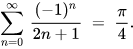 <br>
Esta suma infinita, converge a π/4, por lo que podemos iterar la seria cuanto sea necesario y multiplicar el resultado obtenido por 4 para calcular π.

In [24]:
# b. Programar un algoritmo para aproximar π utilizando la serie de Leibniz, en función de n.
def leibniz(n):
    suma = 0
    for i in range(n):
        suma += (-1)**i/(2*i+1)
    return 4*suma

In [27]:
# c. Ejecutar los programas solicitados en a y b utilizando representación de punto flotante de 32 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.

# Newton-Raphson con 32 bits
pi_nw = newton_raphson(3, f, df, tol=1e-7)
print("Newton-Raphson con 32 bits: ", pi_nw)
print("Error: ", abs(pi_nw - np.pi))

# Leibniz con con n = 10, n = 100, n = 1000, n = 10000 y n = 100000
for n in [10, 100, 1000, 10000, 100000]:
    pi_lb = leibniz(n)
    print("Leibniz con n = ", n, ": ", pi_lb)
    print("Error: ", abs(pi_lb - np.pi))

Newton-Raphson con 32 bits:  3.141592653300477
Error:  2.893161266115385e-10
Leibniz con n =  10 :  3.0418396189294032
Error:  0.09975303466038987
Leibniz con n =  100 :  3.1315929035585537
Error:  0.00999975003123943
Leibniz con n =  1000 :  3.140592653839794
Error:  0.000999999749998981
Leibniz con n =  10000 :  3.1414926535900345
Error:  9.99999997586265e-05
Leibniz con n =  100000 :  3.1415826535897198
Error:  1.0000000073340232e-05


In [29]:
# d. Ejecutar los programas solicitados en a y b utilizando representación de punto flotante de 64 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.

# Newton-Raphson con 64 bits
pi_nw = newton_raphson(3, f, df)
print("Newton-Raphson con 64 bits: ", pi_nw)

print("Newton-Raphson con 64 bits: ", pi_nw)
print("Error: ", abs(pi_nw - np.pi))

# Leibniz con con n = 10, n = 100, n = 1000, n = 10000 y n = 100000
for n in [10, 100, 1000, 10000, 100000]:
    pi_lb = leibniz(n)
    print("Leibniz con n = ", n, ": ", pi_lb)
    print("Error: ", abs(pi_lb - np.pi))

Newton-Raphson con 64 bits:  3.141592653589793
Newton-Raphson con 64 bits:  3.141592653589793
Error:  0.0
Leibniz con n =  10 :  3.0418396189294032
Error:  0.09975303466038987
Leibniz con n =  100 :  3.1315929035585537
Error:  0.00999975003123943
Leibniz con n =  1000 :  3.140592653839794
Error:  0.000999999749998981
Leibniz con n =  10000 :  3.1414926535900345
Error:  9.99999997586265e-05
Leibniz con n =  100000 :  3.1415826535897198
Error:  1.0000000073340232e-05


f. Representar las dos respuestas finales obtenidas (para n = 100000 y el método de Newton Raphson) en c, d y e de manera de expresarlo como π = ¯π + ∆π.

Valor obtenido con la serie de Leibniz, con 100000 iteraciones:<br>
$V_0 = 3.14158 \pm 2 \times 10^{-5}$ 

Valor obtenido para Newton-Raphson con un float de 32 bits:<br>
$V_0 = 3.141592 \pm  1 \times 10^{-6}$

Valor obtenido para Newton-Raphson con un float de 64 bits:<br>
$V_0 = 3.141592653589793 \pm 1 \times 10^{-15} $

g. ¿Podemos afirmar qué para la computadora el número π es una constante?

Si bien sabemos que π es una constante matemática bien definida, su representación en una computadora está sujeta a cierta imprecisión, ya que está limitada por su arquitectura y va a sufrir cierto error de redondeo debido a la precisión del sistema de punto flotante utilizado para almacenar números. <br>
Por lo tanto, el valor numérico de π en una computadora se aproxima a una constante, pero no es exactamente igual a ella.

# 3. Búsqueda de raíces
Para las siguientes funciones continuas y con raíz única en el intervalo [0, 3]:

$f_1(x) = x^3 - 19$

$f_2(x) = x^5 - 7.3x^4 + 2.24x^3 + 30.106x^2 - 42.1x + 15.94$

$f_3(x) = (x - 0.9)e^{-4(x-0.9)^2}$

se pide:
<ol type="a">
    <li> Graficar las funciones en el intervalo de interés.</li>
    <li> Halle para cada una de ellas la raíz en el intervalo indicado mediante los métodos vistos en clase:
        <ul>
            <li> Bisección</li>
            <li> Punto Fijo</li>
            <li> Secante</li>
            <li> Newton-Raphson</li>
            <li> Newton-Raphson modificado</li>
        </ul>
        Use para todos los métodos como criterio de parada las siguientes diferencia entre dos iteraciones sucesivas:
        <ul>
            <li>1 · 10<sup>-5</sup></li>
            <li>1 · 10<sup>-13</sup></li>
        </ul>
        Para Newton-Raphson use semilla x<sub>0</sub> = 0.5.
        Mostrar en una tabla por cada método los resultados obtenidos (en caso que se obtengan muchas iteraciones se pueden mostrar las primeras 5 y las últimas 5).</li>
    <li> Halle la raíz mediante la función de búsqueda de raíces de un lenguaje o paquete orientado a cálculo numérico (e.g. Python+SciPy: scipy.optimize.brentq). Al resultado obtenido le vamos a asignar como "xReal".</li>
    <li> Compare los resultados obtenidos para los distintos métodos y cotas de error, grafique para todos los casos:
        <ul>
            <li>Orden de convergencia P vs iteraciones</li>
            <li>Constante asintótica λ vs iteraciones</li>
            <li>log<sub>10</sub>(/∆x/) vs iteraciones</li>
            <li>log<sub>10</sub>(/x<sub>Candidata</sub> - x<sub>Real</sub>/) vs iteraciones</li>
        </ul>
        Discuta ventajas y desventajas. ¿Son las que esperaba en base a la teoría?</li>
</ol>

In [2]:
# Definimos las funciones con las que vamos a trabajar

def f_1(x):
    return x**3 - 19

def f_2(x):
    return x**5 - 7.3*x**4 + 2.24*x**3 + 30.106*x**2 - 42.1*x + 15.94

def f_3(x):
    return (x - 0.9) * math.e**(-4*(x-0.9)**2)

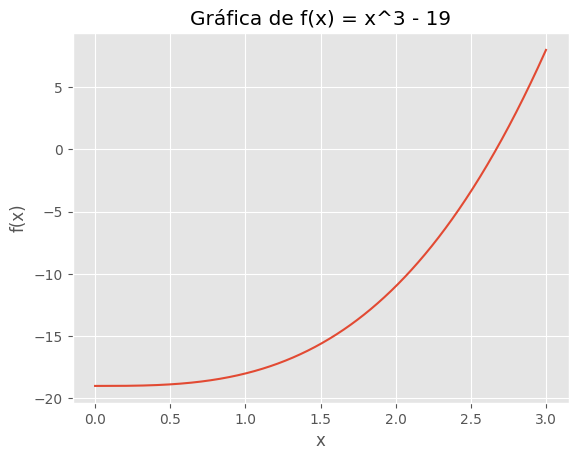

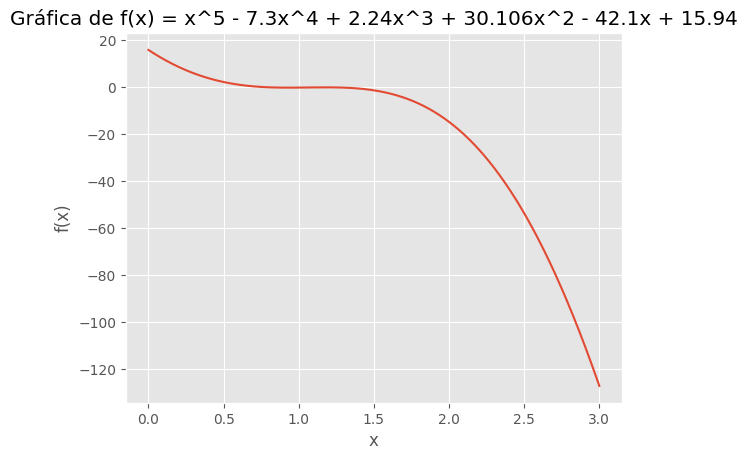

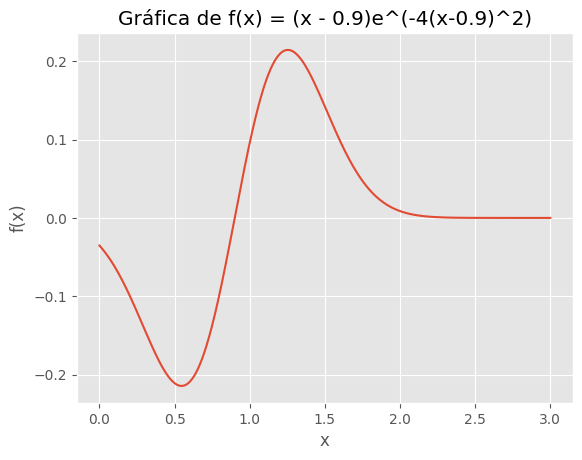

In [3]:
# a. Graficar las funciones en el intervalo [0, 3]

x = np.linspace(0, 3, 1000)
y = f_1(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de f(x) = x^3 - 19")
plt.show()

y = f_2(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de f(x) = x^5 - 7.3x^4 + 2.24x^3 + 30.106x^2 - 42.1x + 15.94")
plt.show()

y = f_3(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de f(x) = (x - 0.9)e^(-4(x-0.9)^2)")
plt.show()

In [14]:
# c. Halle para cada una de ellas la raíz en el intervalo indicado mediante los métodos vistos en clase
# Defino los métodos de busqueda de raíces

# Defino una cantidad de iteraciones máxima para que no se quede en un bucle infinito
MAX_ITER = 1000

def biseccion(f, a, b, tol):
    p = (a + b)/2
    p_ant = a
    for i in range(MAX_ITER):
        if abs(p - p_ant) < tol:
            break;
        p_ant = p
        if f(p)*f(a) < 0:
            b = p
        else:
            a = p
        p = (a + b)/2
    return p

def punto_fijo(f, x0, tol):
    p = x0
    p_ant = p + 2*tol
    for _ in range(MAX_ITER):
        print(p)
        if abs(p - p_ant) < tol:
            break;
        p_ant = p
        p = f(p)
    return p

def secante(f, x0, x1, tol):
    p = x1
    p_ant = x0
    for _ in range(MAX_ITER):
        if abs(p - p_ant) < tol:
            break;
        div = f(p) - f(p_ant)
        if div == 0: break
        x2 = p - f(p) * (p - p_ant) / div
        p_ant = p
        p = x2
    return p

print("Bisección: ", biseccion(f_1, 0, 3, 1e-3))
# print("Punto fijo: ", punto_fijo(f_1, 2, 1e-3))
print("Secante: ", secante(f_1, 0, 3, 1e-3))


Bisección:  2.668212890625
Secante:  2.668398346999415
